<a href="https://colab.research.google.com/github/Joel-Williams-Mathew/SupervisedModel/blob/main/Smart_Diabeties_Analizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Shape: (768, 9)

────────────── 2. EDA ──────────────

🔍 Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

🧮 Missing‑Value Counts (0 = none):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin    

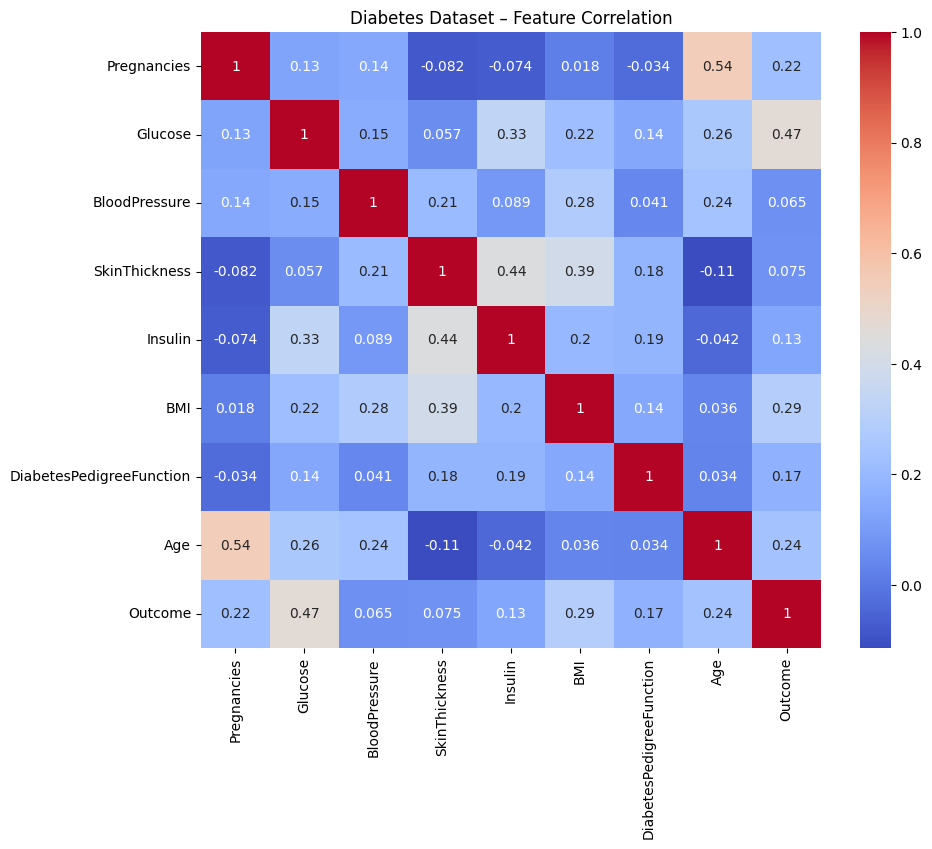


────────────── 3. FEATURE SCALING ──────────────


✅ Accuracy: 0.7597

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



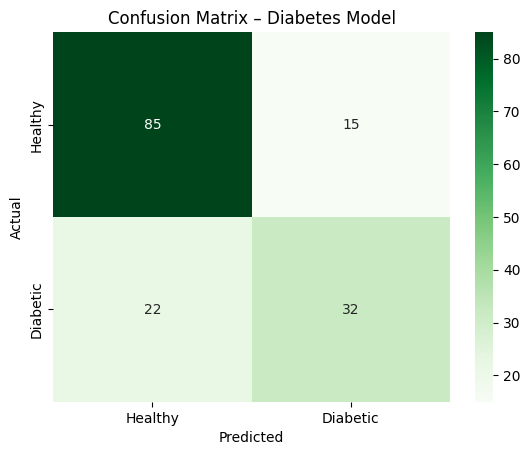


────────────── 7. ROC CURVE ──────────────



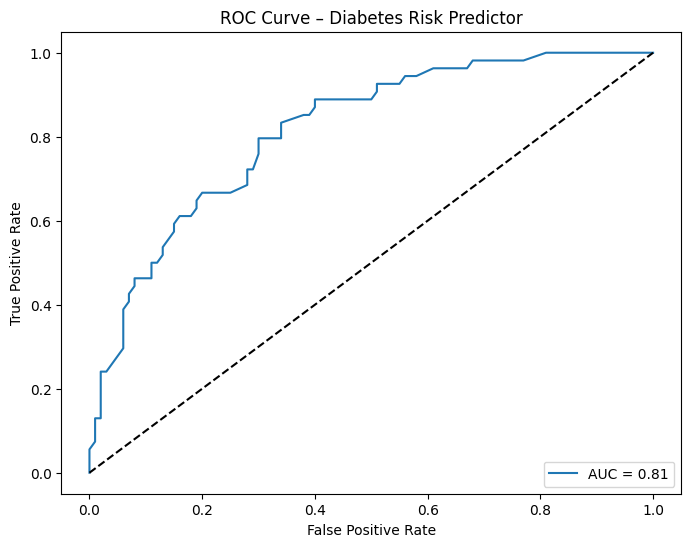

In [2]:
# smart_health_predictor_diabetes.py
# ----------------------------------
# Predicting diabetes risk with Random Forest + ROC curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# ────────────── 1. LOAD DATA ──────────────
df = pd.read_csv("diabetes.csv")      # ➜ ensure this file is in your working folder
print("Shape:", df.shape)

# ────────────── 2. EDA ──────────────
print("\n────────────── 2. EDA ──────────────")
print("\n🔍 Basic Info")
print(df.info())

print("\n🧮 Missing‑Value Counts (0 = none):")
print(df.isnull().sum())

print("\n📊 Correlation Heatmap")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Diabetes Dataset – Feature Correlation")
plt.show()

# ────────────── 3. FEATURE SCALING ──────────────
print("\n────────────── 3. FEATURE SCALING ──────────────\n")
X = df.drop("Outcome", axis=1)   # 8 clinical predictors
y = df["Outcome"]                # 1 = diabetes, 0 = healthy

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ────────────── 4. TRAIN / TEST SPLIT ──────────────
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ────────────── 5. MODEL TRAINING ──────────────
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ────────────── 6. EVALUATION ──────────────
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Healthy", "Diabetic"],
            yticklabels=["Healthy", "Diabetic"])
plt.title("Confusion Matrix – Diabetes Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ────────────── 7. ROC CURVE ──────────────
print("\n────────────── 7. ROC CURVE ──────────────\n")
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve – Diabetes Risk Predictor")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()